In [1]:
import sqlite3
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

conn = sqlite3.connect('/Users/nickospelt/Documents/App_Projects/PGA_Score_Predictor/Data/PGA_SQL_DB/PGA.db')

## Pull Data

In [2]:
player_tournament_query = """
SELECT *,
 (CASE 
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%MASTERS%" THEN 1.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%U.S. OPEN%" THEN 2.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%THE OPEN%" THEN 3.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PGA%" THEN 4.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PLAYERS%" THEN 5.0
  END) AS TOURNAMENT_F,
  R1_WIND_SPEED * R1_WIND_DIRECT AS R1_WIND_FACT,
  R2_WIND_SPEED * R2_WIND_DIRECT AS R2_WIND_FACT,
  R3_WIND_SPEED * R3_WIND_DIRECT AS R3_WIND_FACT,
  R4_WIND_SPEED * R4_WIND_DIRECT AS R4_WIND_FACT,
  R1_SCORE - PAR AS R1_SCORE_TO_PAR,
  R2_SCORE - PAR AS R2_SCORE_TO_PAR,
  R3_SCORE - PAR AS R3_SCORE_TO_PAR,
  R4_SCORE - PAR AS R4_SCORE_TO_PAR,
  (R1_SCORE + R2_SCORE + R3_SCORE + R4_SCORE) AS TOTAL_SCORE,
  (R1_SCORE + R2_SCORE + R3_SCORE + R4_SCORE) - (PAR * 4) AS TOTAL_SCORE_TO_PAR,
  (R1_TEMP + R2_TEMP + R3_TEMP + R4_TEMP) / 4 AS AVG_TEMP,
  (R1_PRECIP + R2_PRECIP + R3_PRECIP + R4_PRECIP) / 4 AS AVG_PRECIP,
  (R1_WIND_SPEED + R2_WIND_SPEED + R3_WIND_SPEED + R4_WIND_SPEED) / 4 AS AVG_WIND_SPEED
FROM PLAYER_TOURNAMENT_RESULTS_V1"""

raw_player_tournament_df = pd.read_sql_query(player_tournament_query, conn)
raw_player_tournament_df

,TOURNAMENT_NAME,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R1_WIND_DIRECT,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R2_WIND_DIRECT,R3_TEMP,...,R4_WIND_FACT,R1_SCORE_TO_PAR,R2_SCORE_TO_PAR,R3_SCORE_TO_PAR,R4_SCORE_TO_PAR,TOTAL_SCORE,TOTAL_SCORE_TO_PAR,AVG_TEMP,AVG_PRECIP,AVG_WIND_SPEED
0,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,465.0,-3,-6,-5,-1,273,-15,58.725,0.0925,12.750
1,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,465.0,-2,0,-7,-5,274,-14,58.725,0.0925,12.750
2,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,465.0,-6,2,-1,-8,275,-13,58.725,0.0925,12.750
3,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,465.0,3,-4,-7,-3,277,-11,58.725,0.0925,12.750
4,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,465.0,1,-3,-4,-3,279,-9,58.725,0.0925,12.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,2175.6,-2,3,7,4,292,12,66.125,0.0040,10.925
1725,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,2175.6,0,2,5,6,293,13,66.125,0.0040,10.925
1726,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,2175.6,-1,3,8,4,294,14,66.125,0.0040,10.925
1727,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,2175.6,0,2,4,9,295,15,66.125,0.0040,10.925


In [4]:
query = """SELECT DISTINCT TOURNAMENT_NAME,ELEVATION,R1_TEMP, R1_PRECIP, R1_WIND_SPEED, R2_TEMP, R2_PRECIP, R2_WIND_SPEED, R3_TEMP, R3_PRECIP, R3_WIND_SPEED,R4_TEMP, R4_PRECIP, R4_WIND_SPEED
FROM PLAYER_TOURNAMENT_RESULTS_V1
WHERE UPPER(TOURNAMENT_NAME) LIKE \"%PGA%\""""

weather_df = pd.read_sql_query(query, conn)
weather_df

,TOURNAMENT_NAME,ELEVATION,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R3_TEMP,R3_PRECIP,R3_WIND_SPEED,R4_TEMP,R4_PRECIP,R4_WIND_SPEED
0,2018 PGA Championship,147.0,77.2,0.000,5.3,77.9,0.004,7.3,77.1,0.201,8.0,78.4,0.000,6.0
1,2019 PGA Championship,36.0,58.4,0.031,7.1,60.7,0.012,9.0,62.4,0.004,9.1,60.9,0.008,12.3
2,2021 PGA Championship,6.0,72.6,0.000,12.2,71.2,0.000,15.3,72.7,0.000,10.3,74.0,0.000,14.3
3,2022 PGA Championship,217.0,79.6,0.000,14.2,81.1,0.031,22.1,63.8,0.689,16.5,59.4,0.000,13.7
4,2023 PGA Championship,155.0,46.8,0.000,8.0,61.4,0.016,15.5,62.9,0.850,12.5,60.2,0.000,12.2


- Weather can make a round more difficult, but only generally if the either the wind or precipitation is extreme
- Having it on a per_round basis is usefully, but some how quantifying the amount of weather affect is probably more useful (i.e. summing them all together, weighted average somehow)

## Observe Distribution of Scores

In [5]:
print(f"Round 1: Mean: {raw_player_tournament_df['R1_SCORE'].mean()}, STD: {raw_player_tournament_df['R1_SCORE'].std()}")
print(f"Round 2: Mean: {raw_player_tournament_df['R2_SCORE'].mean()}, STD: {raw_player_tournament_df['R2_SCORE'].std()}")
print(f"Round 3: Mean: {raw_player_tournament_df['R3_SCORE'].mean()}, STD: {raw_player_tournament_df['R3_SCORE'].std()}")
print(f"Round 4: Mean: {raw_player_tournament_df['R4_SCORE'].mean()}, STD: {raw_player_tournament_df['R4_SCORE'].std()}")

Round 1: Mean: 71.10005783689994, STD: 2.5596687152516715
Round 2: Mean: 70.57316367842684, STD: 2.5807552990524667
Round 3: Mean: 71.74725274725274, STD: 3.137525771857176
Round 4: Mean: 71.65587044534414, STD: 3.2079042746094735


# Correlation Between Weather and Golf Scores

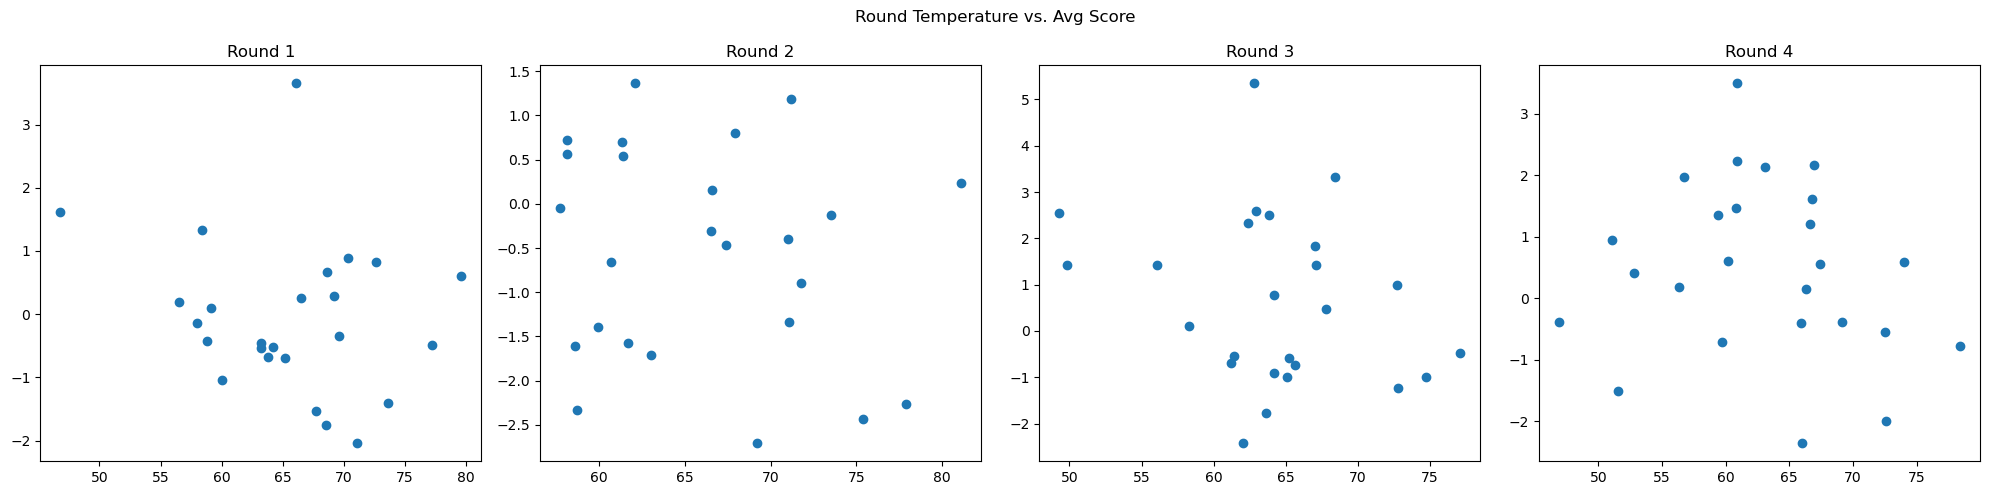

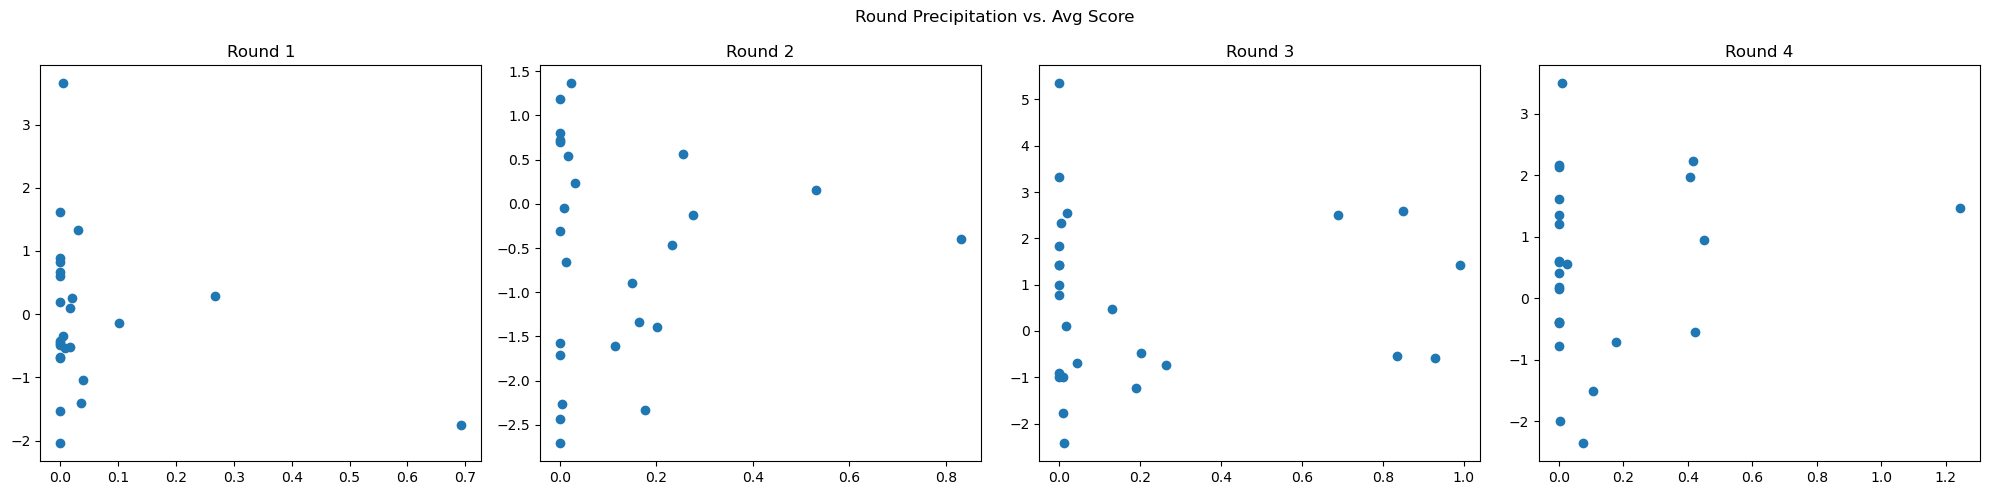

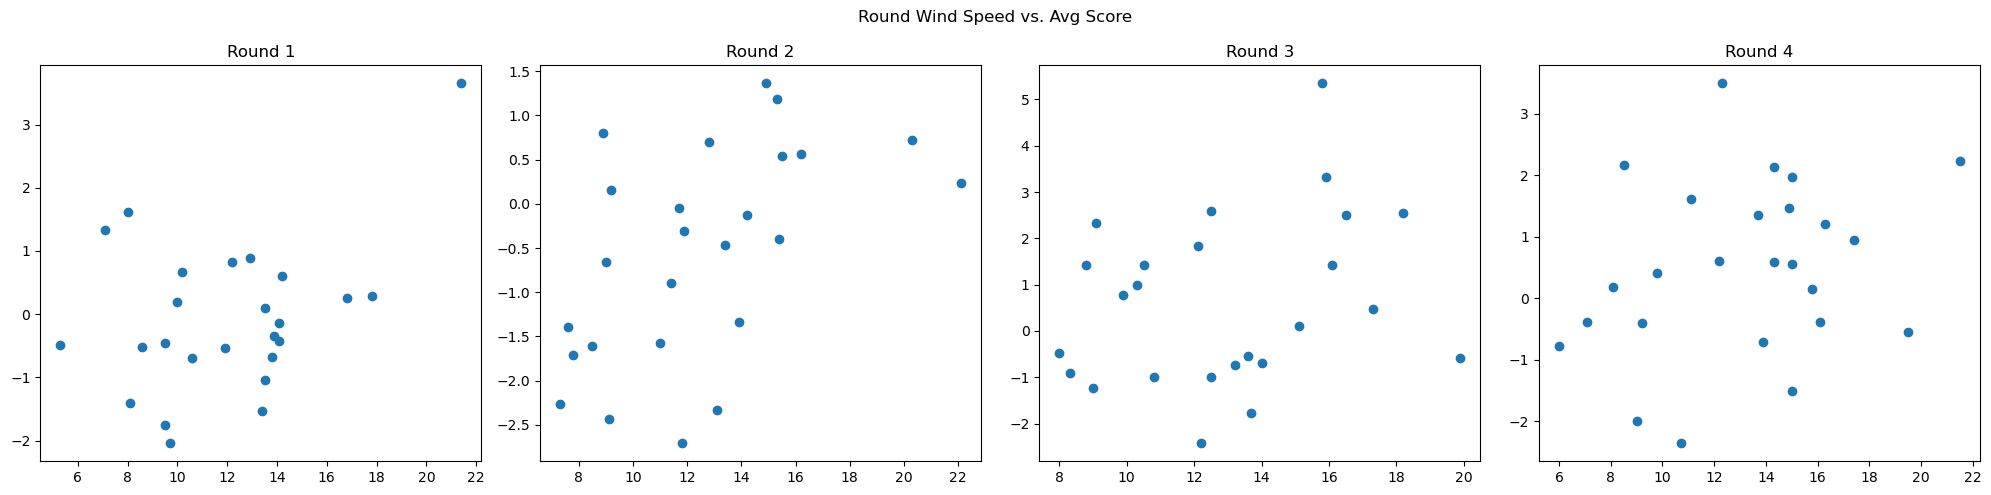

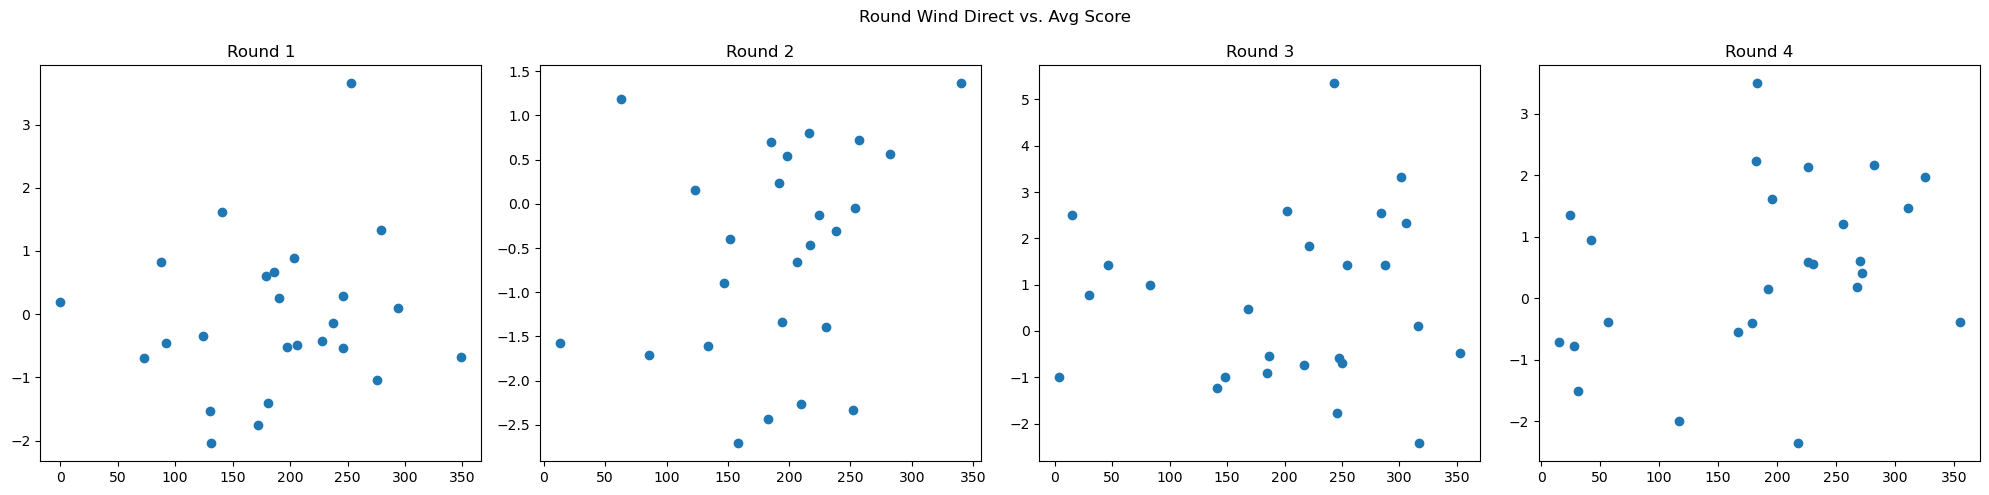

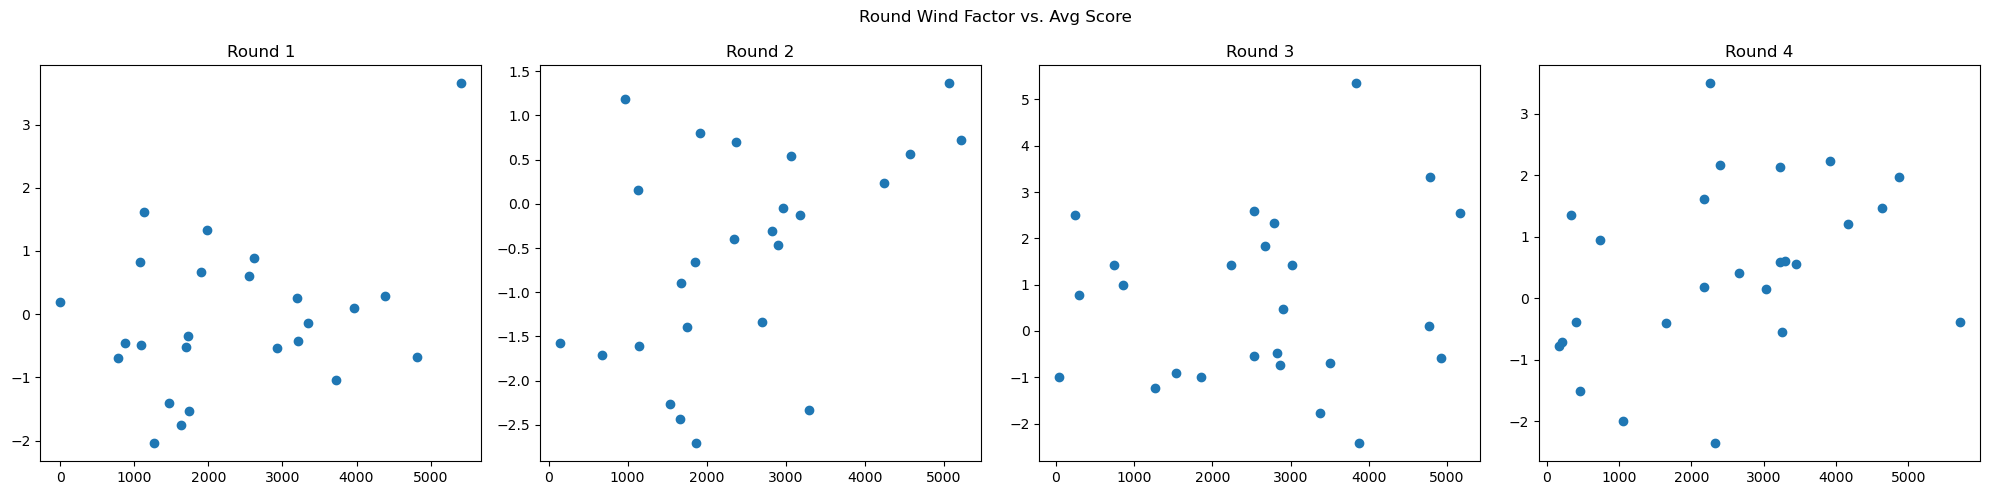

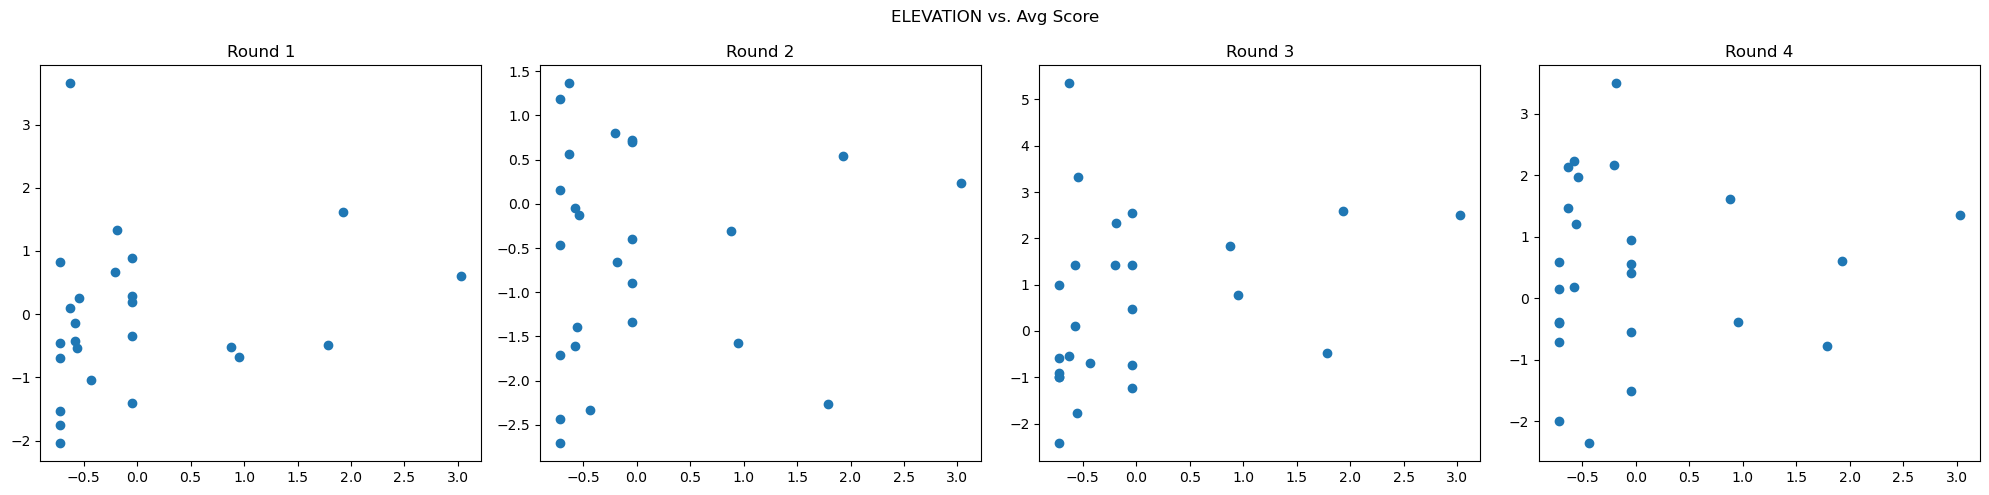

In [13]:
round_feature_mapping = {1: ['R1_TEMP', 'R1_PRECIP', 'R1_WIND_SPEED', 'R1_WIND_DIRECT', 'R1_WIND_FACT', 'ELEVATION', 'R1_SCORE_TO_PAR'],
                        2: ['R2_TEMP', 'R2_PRECIP', 'R2_WIND_SPEED', 'R2_WIND_DIRECT', 'R2_WIND_FACT', 'ELEVATION', 'R2_SCORE_TO_PAR'],
                        3: ['R3_TEMP', 'R3_PRECIP', 'R3_WIND_SPEED', 'R3_WIND_DIRECT', 'R3_WIND_FACT', 'ELEVATION', 'R3_SCORE_TO_PAR'],
                        4: ['R4_TEMP', 'R4_PRECIP', 'R4_WIND_SPEED', 'R4_WIND_DIRECT', 'R4_WIND_FACT', 'ELEVATION', 'R4_SCORE_TO_PAR']}

scaler = StandardScaler()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Temperature vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][0]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Precipitation vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][1]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Wind Speed vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][2]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Wind Direct vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][3]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Wind Factor vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][4]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=((20,5)))
fig.suptitle('ELEVATION vs. Avg Score')
raw_player_tournament_df[['ELEVATION']] = scaler.fit_transform(raw_player_tournament_df[['ELEVATION']])
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][5]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][6]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

In [15]:
# Create weather feature (Weighted average of temp, precipiation, and wind speed)
def weather_weighted_average(temp, precip, wind_speed, elevation):
    weights = [0.1, 0.1, 0.3, 0.5]
    return (temp * -1 * weights[0] + elevation * weights[1] + precip * weights[2] + wind_speed * weights[3]) / (weights[0] + weights[1] + weights[2] + weights[3])

scaler = StandardScaler()
raw_player_tournament_df[['R1_TEMP', 'R1_PRECIP', 'R1_WIND_SPEED', 'R1_WIND_DIRECT', 'R1_WIND_FACT', 
'R2_TEMP', 'R2_PRECIP', 'R2_WIND_SPEED', 'R2_WIND_DIRECT', 'R2_WIND_FACT', 
'R3_TEMP', 'R3_PRECIP', 'R3_WIND_SPEED', 'R3_WIND_DIRECT', 'R3_WIND_FACT', 
'R4_TEMP', 'R4_PRECIP', 'R4_WIND_SPEED', 'R4_WIND_DIRECT', 'R4_WIND_FACT', 'ELEVATION']] = scaler.fit_transform(raw_player_tournament_df[['R1_TEMP', 'R1_PRECIP', 'R1_WIND_SPEED', 'R1_WIND_DIRECT', 'R1_WIND_FACT',
'R2_TEMP', 'R2_PRECIP', 'R2_WIND_SPEED', 'R2_WIND_DIRECT', 'R2_WIND_FACT', 
'R3_TEMP', 'R3_PRECIP', 'R3_WIND_SPEED', 'R3_WIND_DIRECT', 'R3_WIND_FACT', 
'R4_TEMP', 'R4_PRECIP', 'R4_WIND_SPEED', 'R4_WIND_DIRECT', 'R4_WIND_FACT', 'ELEVATION']])

raw_player_tournament_df['R1_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R1_TEMP'], row['R1_PRECIP'], row['R1_WIND_SPEED'], row['ELEVATION']), axis=1)
raw_player_tournament_df['R2_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R2_TEMP'], row['R2_PRECIP'], row['R2_WIND_SPEED'], row['ELEVATION']), axis=1)
raw_player_tournament_df['R3_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R3_TEMP'], row['R3_PRECIP'], row['R3_WIND_SPEED'], row['ELEVATION']), axis=1)
raw_player_tournament_df['R4_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R4_TEMP'], row['R4_PRECIP'], row['R4_WIND_SPEED'], row['ELEVATION']), axis=1)

raw_player_tournament_df

,TOURNAMENT_NAME,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R1_WIND_DIRECT,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R2_WIND_DIRECT,R3_TEMP,...,R4_SCORE_TO_PAR,TOTAL_SCORE,TOTAL_SCORE_TO_PAR,AVG_TEMP,AVG_PRECIP,AVG_WIND_SPEED,R1_WEATHER_FACTOR,R2_WEATHER_FACTOR,R3_WEATHER_FACTOR,R4_WEATHER_FACTOR
0,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,-2.463654,-0.698112,-0.627097,0.125666,-0.060821,0.187288,...,-1,273,-15,58.725,0.0925,12.750,-0.255502,-0.059788,0.110776,0.399475
1,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,-2.463654,-0.698112,-0.627097,0.125666,-0.060821,0.187288,...,-5,274,-14,58.725,0.0925,12.750,-0.255502,-0.059788,0.110776,0.399475
2,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,-2.463654,-0.698112,-0.627097,0.125666,-0.060821,0.187288,...,-8,275,-13,58.725,0.0925,12.750,-0.255502,-0.059788,0.110776,0.399475
3,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,-2.463654,-0.698112,-0.627097,0.125666,-0.060821,0.187288,...,-3,277,-11,58.725,0.0925,12.750,-0.255502,-0.059788,0.110776,0.399475
4,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,-2.463654,-0.698112,-0.627097,0.125666,-0.060821,0.187288,...,-3,279,-9,58.725,0.0925,12.750,-0.255502,-0.059788,0.110776,0.399475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2023 U.S. Open,-0.161016,-0.215934,-0.955460,0.085250,0.075143,-0.627097,-0.116200,0.688799,0.414486,...,4,292,12,66.125,0.0040,10.925,-0.438307,-0.165642,-0.230739,-0.337913
1725,2023 U.S. Open,-0.161016,-0.215934,-0.955460,0.085250,0.075143,-0.627097,-0.116200,0.688799,0.414486,...,6,293,13,66.125,0.0040,10.925,-0.438307,-0.165642,-0.230739,-0.337913
1726,2023 U.S. Open,-0.161016,-0.215934,-0.955460,0.085250,0.075143,-0.627097,-0.116200,0.688799,0.414486,...,4,294,14,66.125,0.0040,10.925,-0.438307,-0.165642,-0.230739,-0.337913
1727,2023 U.S. Open,-0.161016,-0.215934,-0.955460,0.085250,0.075143,-0.627097,-0.116200,0.688799,0.414486,...,9,295,15,66.125,0.0040,10.925,-0.438307,-0.165642,-0.230739,-0.337913


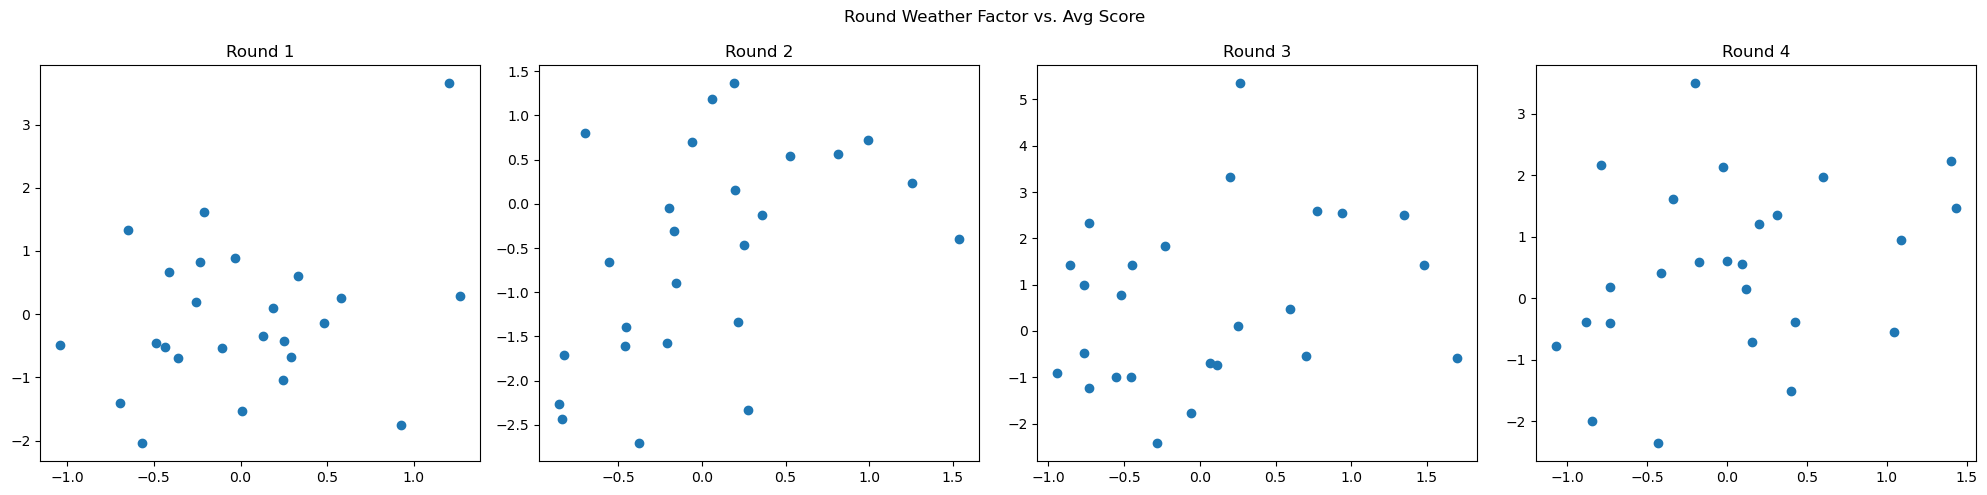

Round 1 Correlation: 0.10499413211922153
Round 2 Correlation: 0.234842252410595
Round 3 Correlation: 0.13067895963143905
Round 4 Correlation: 0.13635420923678526


In [16]:
# Vizualize relationship between weather factor and scrore to par
round_feature_mapping = {1: ['R1_WEATHER_FACTOR', 'R1_SCORE_TO_PAR'],
                        2: ['R2_WEATHER_FACTOR', 'R2_SCORE_TO_PAR'],
                        3: ['R3_WEATHER_FACTOR', 'R3_SCORE_TO_PAR'],
                        4: ['R4_WEATHER_FACTOR', 'R4_SCORE_TO_PAR']}

fig = plt.figure(figsize=((20,5)))
fig.suptitle('Round Weather Factor vs. Avg Score')
for key in round_feature_mapping:
    plt.subplot(1,4,key)
    plt.scatter(raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][0]].mean(), raw_player_tournament_df.groupby('TOURNAMENT_NAME')[round_feature_mapping[key][1]].mean())
    plt.title(f'Round {key}')

plt.tight_layout()
plt.show()

# Correlation between weather factor and score to par
r1_corr = raw_player_tournament_df['R1_WEATHER_FACTOR'].corr(raw_player_tournament_df['R1_SCORE_TO_PAR'])
r2_corr = raw_player_tournament_df['R2_WEATHER_FACTOR'].corr(raw_player_tournament_df['R2_SCORE_TO_PAR'])
r3_corr = raw_player_tournament_df['R3_WEATHER_FACTOR'].corr(raw_player_tournament_df['R3_SCORE_TO_PAR'])
r4_corr = raw_player_tournament_df['R4_WEATHER_FACTOR'].corr(raw_player_tournament_df['R4_SCORE_TO_PAR'])

print(f"Round 1 Correlation: {r1_corr}")
print(f"Round 2 Correlation: {r2_corr}")
print(f"Round 3 Correlation: {r3_corr}")
print(f"Round 4 Correlation: {r4_corr}")

- A larger weather factor for a round results in larger tournament scores to par (i.e. -10 means 10 under for the tournament).

# Correlation Between Player Statistics and Score

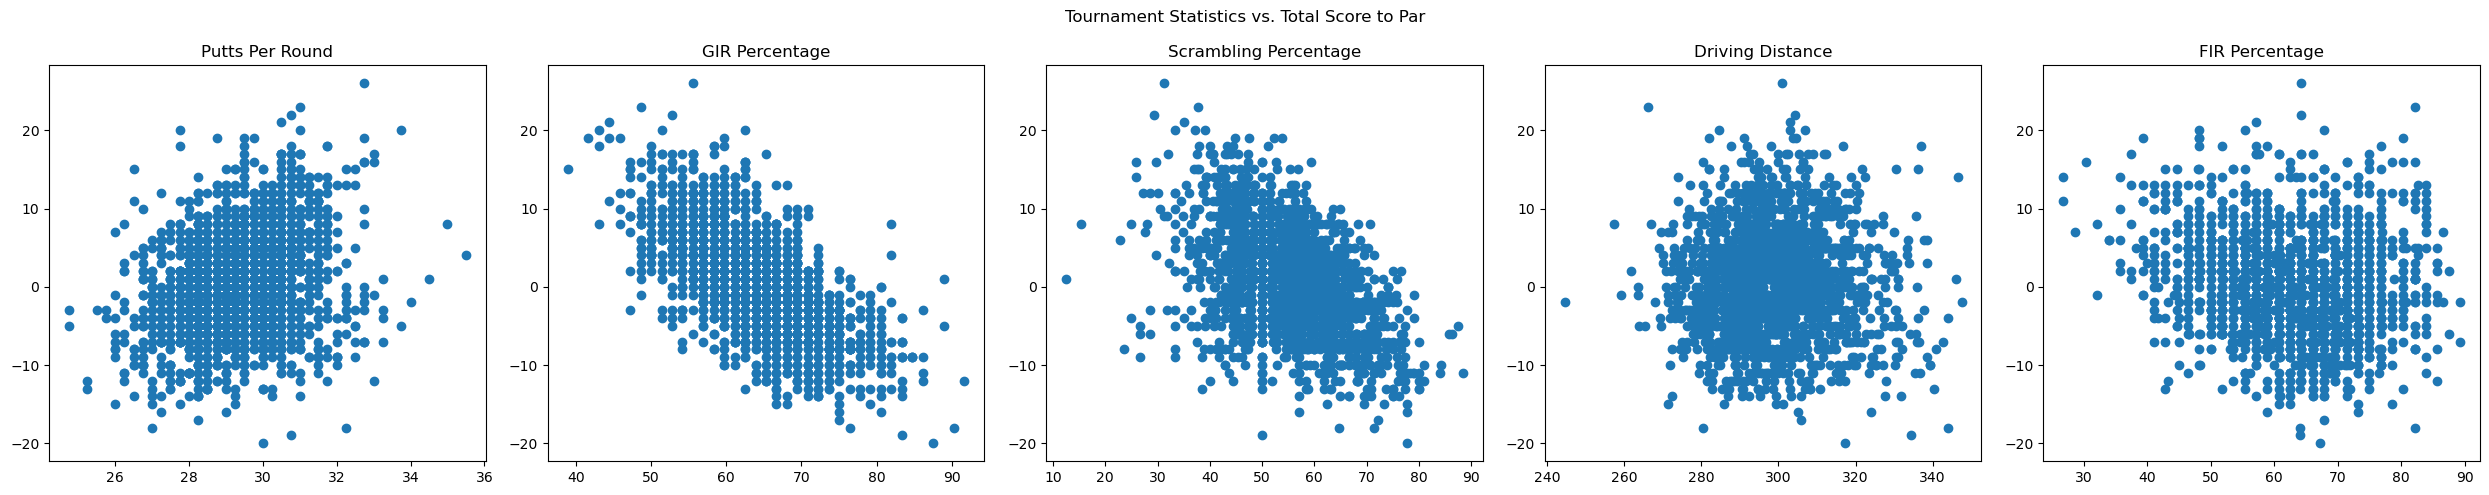

Putts Per Round Correlation: 0.2618389139972238
GIR Percentage Correlation: -0.6505694768525664
Scrambling Correlation: -0.47053543313953855
Driving Distance Correlation: -0.0031304250845479494
FIR Percentage Correlation: -0.15757969630845792


In [161]:
# Vizualize relationship between tournament statistics and total score to par
fig = plt.figure(figsize=((25,5)))
fig.suptitle('Tournament Statistics vs. Total Score to Par')

plt.subplot(1,5,1)
plt.scatter(raw_player_tournament_df['PUTTS_PER_ROUND'], raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
plt.title("Putts Per Round")

plt.subplot(1,5,2)
plt.scatter(raw_player_tournament_df['GIR_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
plt.title("GIR Percentage")

plt.subplot(1,5,3)
plt.scatter(raw_player_tournament_df['SCRAMBLING_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
plt.title("Scrambling Percentage")

plt.subplot(1,5,4)
plt.scatter(raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'], raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
plt.title("Driving Distance")

plt.subplot(1,5,5)
plt.scatter(raw_player_tournament_df['FIR_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
plt.title("FIR Percentage")

plt.tight_layout()
plt.show()

# Correlation between tournament statistic and score to par
putts_corr = raw_player_tournament_df['PUTTS_PER_ROUND'].corr(raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
gir_corr = raw_player_tournament_df['GIR_PERCENTAGE'].corr(raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
scrambling_corr= raw_player_tournament_df['SCRAMBLING_PERCENTAGE'].corr(raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
drive_dist_corr = raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'].corr(raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])
fir_corr = raw_player_tournament_df['FIR_PERCENTAGE'].corr(raw_player_tournament_df['TOTAL_SCORE_TO_PAR'])

print(f"Putts Per Round Correlation: {putts_corr}")
print(f"GIR Percentage Correlation: {gir_corr}")
print(f"Scrambling Correlation: {scrambling_corr}")
print(f"Driving Distance Correlation: {drive_dist_corr}")
print(f"FIR Percentage Correlation: {fir_corr}")

- GIR, Scrambling, and Putting seem to have the highest correlation between the statistic and the score.
- FIR and Driving Distance not so much.

## Driving Distance and FIR vs. GIR Percentage

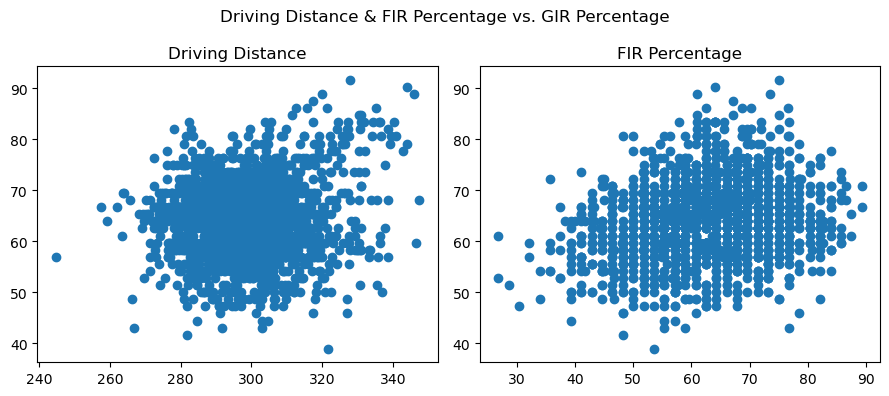

Driving Distance Correlation: 0.12684154165462502
FIR Percentage Correlation: 0.21343634504995707


In [162]:
# Vizualize Relationship between statistics
fig = plt.figure(figsize=((9,4)))
fig.suptitle('Driving Distance & FIR Percentage vs. GIR Percentage')

plt.subplot(1,2,1)
plt.scatter(raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'], raw_player_tournament_df['GIR_PERCENTAGE'])
plt.title("Driving Distance")

plt.subplot(1,2,2)
plt.scatter(raw_player_tournament_df['FIR_PERCENTAGE'], raw_player_tournament_df['GIR_PERCENTAGE'])
plt.title("FIR Percentage")

plt.tight_layout()
plt.show()

# Correlation between statistics
drive_dist_corr = raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'].corr(raw_player_tournament_df['GIR_PERCENTAGE'])
fir_corr = raw_player_tournament_df['FIR_PERCENTAGE'].corr(raw_player_tournament_df['GIR_PERCENTAGE'])

print(f"Driving Distance Correlation: {drive_dist_corr}")
print(f"FIR Percentage Correlation: {fir_corr}")

- FIR Percentage and Driving distance could have some correlation with GIR Percentage.
- Since these don't have as much of correlation to score, use these two to improve the quality of GIR Percentage feature.

## Scrambling vs Putts Per Round

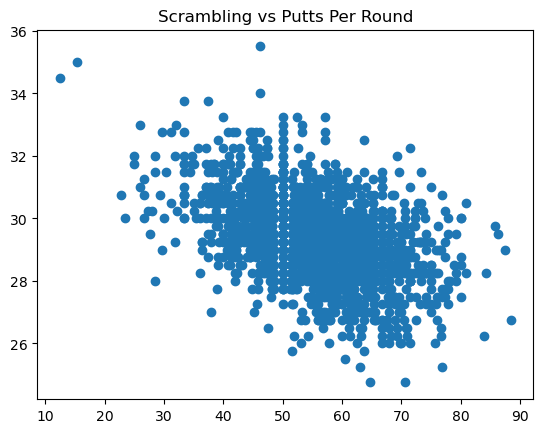

In [163]:
plt.scatter(raw_player_tournament_df['SCRAMBLING_PERCENTAGE'], raw_player_tournament_df['PUTTS_PER_ROUND'])
plt.title("Scrambling vs Putts Per Round")
plt.show()

- It makes sense that scrambling is inversly related to putting.
- However, since there is also a correlation between score and scrambling. Will use this as its own feature.

## Examine Round Scores for Tournaments Year over Year

In [178]:
tournament_round_averages_query = """WITH
ROUND_AVERAGES AS (
SELECT TOURNAMENT_NAME, ROUND_NUMBER, AVG(SCORE) AS AVG_SCORE
FROM RAW_TOURNAMENT_ROUNDS
GROUP BY 1,2
)

SELECT *,
(CASE 
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%MASTERS%" THEN 1.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%U.S. OPEN%" THEN 2.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%THE OPEN%" THEN 3.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PGA%" THEN 4.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PLAYERS%" THEN 5.0
  END) AS TOURNAMENT_F
FROM ROUND_AVERAGES
ORDER BY TOURNAMENT_F, ROUND_NUMBER, TOURNAMENT_NAME"""

tournament_round_averages_df = pd.read_sql_query(tournament_round_averages_query, conn)
tournament_round_averages_df['TOURNAMENT_YEAR'] = tournament_round_averages_df.apply(lambda row: row['TOURNAMENT_NAME'].split()[0], axis=1)

min_avg_score = tournament_round_averages_df['AVG_SCORE'].min()
max_avg_score = tournament_round_averages_df['AVG_SCORE'].max()

tournament_round_averages_df.loc[tournament_round_averages_df['TOURNAMENT_NAME'] == '2018 U.S. Open']

,TOURNAMENT_NAME,ROUND_NUMBER,AVG_SCORE,TOURNAMENT_F,TOURNAMENT_YEAR
20,2018 U.S. Open,1,73.651515,2.0,2018
25,2018 U.S. Open,2,71.363636,2.0,2018
30,2018 U.S. Open,3,75.348485,2.0,2018
35,2018 U.S. Open,4,72.136364,2.0,2018


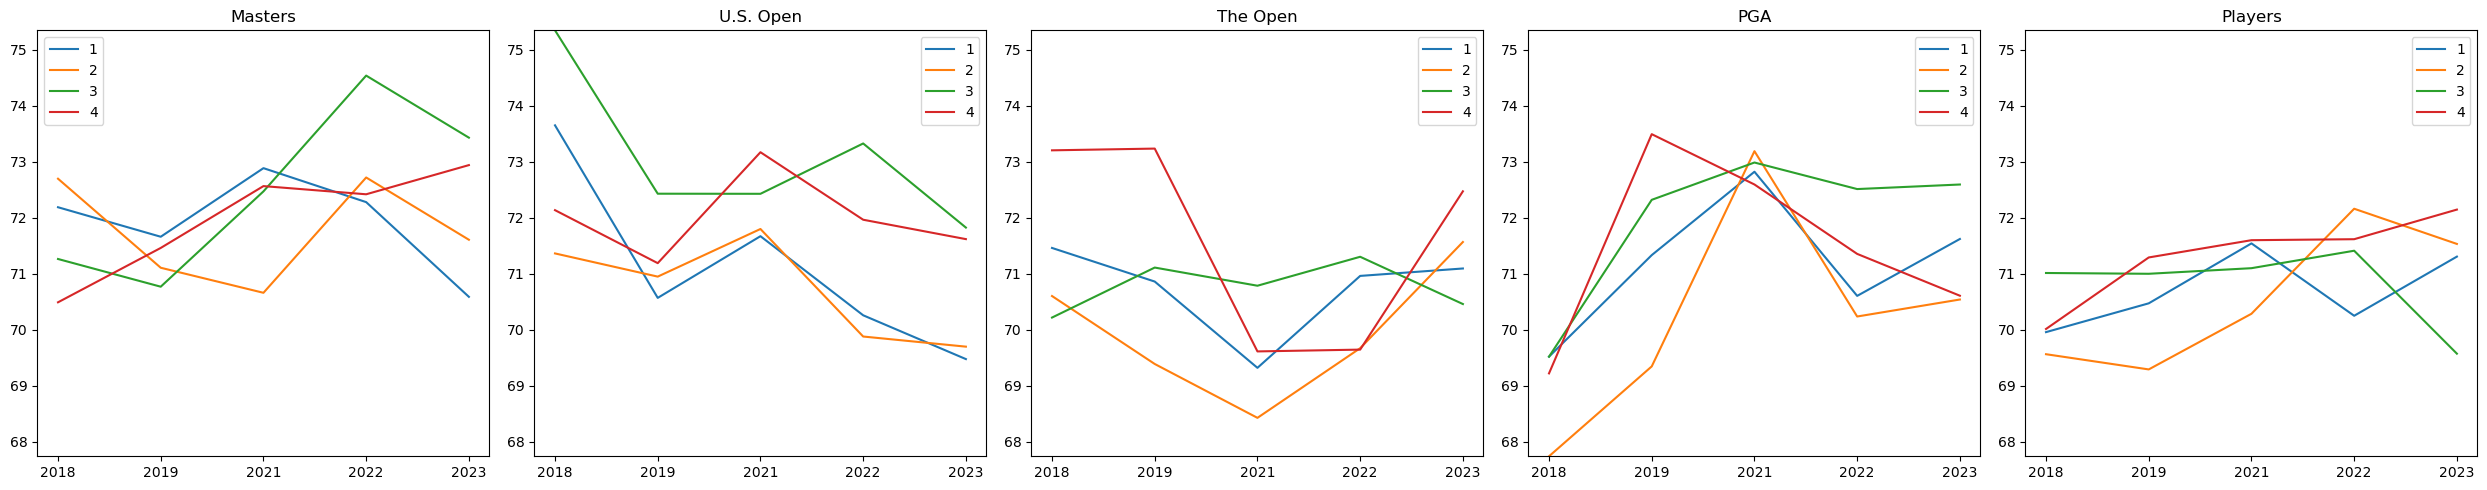

In [165]:
tournament_mapping = {1: 'Masters', 2: 'U.S. Open', 3: 'The Open', 4: 'PGA', 5: 'Players'}
plt.figure(figsize=(25, 5))

for key in tournament_mapping:
    plt.subplot(1, 5, key)
    masters_r1_df = tournament_round_averages_df.loc[(tournament_round_averages_df['TOURNAMENT_F'] == key) & (tournament_round_averages_df['ROUND_NUMBER'] == 1)]
    masters_r2_df = tournament_round_averages_df.loc[(tournament_round_averages_df['TOURNAMENT_F'] == key) & (tournament_round_averages_df['ROUND_NUMBER'] == 2)]
    masters_r3_df = tournament_round_averages_df.loc[(tournament_round_averages_df['TOURNAMENT_F'] == key) & (tournament_round_averages_df['ROUND_NUMBER'] == 3)]
    masters_r4_df = tournament_round_averages_df.loc[(tournament_round_averages_df['TOURNAMENT_F'] == key) & (tournament_round_averages_df['ROUND_NUMBER'] == 4)]
    plt.plot(masters_r1_df['TOURNAMENT_YEAR'], masters_r1_df['AVG_SCORE'], label='1')
    plt.plot(masters_r2_df['TOURNAMENT_YEAR'], masters_r2_df['AVG_SCORE'], label='2')
    plt.plot(masters_r3_df['TOURNAMENT_YEAR'], masters_r3_df['AVG_SCORE'], label='3')
    plt.plot(masters_r4_df['TOURNAMENT_YEAR'], masters_r4_df['AVG_SCORE'], label='4')
    plt.ylim(min_avg_score, max_avg_score)
    plt.title(tournament_mapping[key])
    plt.legend()

plt.tight_layout()
plt.show()

- Players and the masters are played at the same course every year.

### Can weather explain some variation?

In [166]:
tournament_round_weather = raw_player_tournament_df[['TOURNAMENT_NAME', 'TOURNAMENT_F', 'R1_WEATHER_FACTOR', 'R2_WEATHER_FACTOR', 'R3_WEATHER_FACTOR', 'R4_WEATHER_FACTOR']].drop_duplicates().reset_index(drop=True).sort_values(by=['TOURNAMENT_F', 'TOURNAMENT_NAME'])
tournament_round_weather

,TOURNAMENT_NAME,TOURNAMENT_F,R1_WEATHER_FACTOR,R2_WEATHER_FACTOR,R3_WEATHER_FACTOR,R4_WEATHER_FACTOR
0,2018 Masters Tournament,1.0,-0.127327,0.014326,0.096350,0.563523
5,2019 Masters Tournament,1.0,0.076870,-0.234878,-0.863968,0.925466
10,2021 Masters Tournament,1.0,-0.095504,0.146984,0.546957,0.046363
15,2022 Masters Tournament,1.0,1.218117,1.117271,1.189149,-0.264812
20,2023 Masters Tournament,1.0,-0.804662,1.466794,1.722168,1.258379
4,2018 U.S. Open,2.0,1.256177,0.312901,0.356428,0.044938
9,2019 U.S. Open,2.0,0.399420,-0.013018,-0.257494,-0.581020
14,2021 U.S. Open,2.0,-0.437198,-0.706004,-0.881188,-0.814483
19,2022 U.S. Open,2.0,0.616172,0.301798,0.190356,0.747723
24,2023 U.S. Open,2.0,-0.510307,-0.261258,-0.360290,-0.472438
